<a href="https://colab.research.google.com/github/Pballer/auto_trader/blob/colab/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [0]:
#!pip install tensorflow==2.0

In [0]:
import tensorflow.keras as keras
import numpy as np
import seaborn as sns

# Intro Guide to RNN timeseries prediction

In [0]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [0]:
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

In [0]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

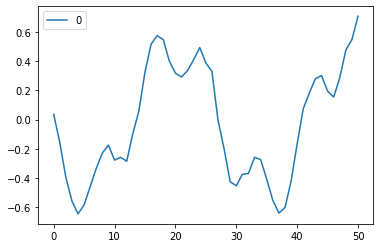

In [0]:
sns.lineplot(data=series[0]);

In [0]:
# [batch size, time steps, dimensionality], 
# where dimensionality is 1 for univariate time series and more for multivariate time series.
X_train.shape

(7000, 50, 1)

### Naive approach: T-1 prediciton

In [0]:
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.021407522

### Naive approach: Linear Model

In [0]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

In [0]:
model.compile(optimizer='adam', loss='mse')

In [0]:
history = model.fit(X_train, y_train, epochs=20)

Train on 7000 samples
Epoch 1/20
7000/7000 [==============================] - 1s 105us/sample - loss: 0.1216
Epoch 2/20
7000/7000 [==============================] - 0s 47us/sample - loss: 0.0521
Epoch 3/20
7000/7000 [==============================] - 0s 43us/sample - loss: 0.0307
Epoch 4/20
7000/7000 [==============================] - 0s 45us/sample - loss: 0.0200
Epoch 5/20
7000/7000 [==============================] - 0s 44us/sample - loss: 0.0149
Epoch 6/20
7000/7000 [==============================] - 0s 44us/sample - loss: 0.0123
Epoch 7/20
7000/7000 [==============================] - 0s 46us/sample - loss: 0.0106
Epoch 8/20
7000/7000 [==============================] - 0s 45us/sample - loss: 0.0094
Epoch 9/20
7000/7000 [==============================] - 0s 45us/sample - loss: 0.0084
Epoch 10/20
7000/7000 [==============================] - 0s 45us/sample - loss: 0.0075
Epoch 11/20
7000/7000 [==============================] - 0s 46us/sample - loss: 0.0069
Epoch 12/20
7000/7000 [======

In [0]:
score = model.evaluate(X_test, y_test)

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
score

0.004186942905187607

### Simple RNN

In [0]:
keras.backend.clear_session()
rnn_model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

In [0]:
rnn_model.compile(optimizer='adam', loss='mse')

In [0]:
history = rnn_model.fit(X_train, y_train, epochs=20)

Train on 7000 samples
Epoch 1/20
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.0687
Epoch 2/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0479
Epoch 3/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0324
Epoch 4/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0217
Epoch 5/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0157
Epoch 6/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0131
Epoch 7/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0123
Epoch 8/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0120
Epoch 9/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0119
Epoch 10/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0118
Epoch 11/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0116
Epoch 12/20
7000/7000 [=============

In [0]:
score = rnn_model.evaluate(X_test, y_test)

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

#### Better than naive T-1, but still worse than linear model

In [0]:
score

0.010483284590765835

### Multiple RNN Layers

In [0]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

In [0]:
model.compile(optimizer='adam', loss='mse')

In [0]:
history = model.fit(X_train, y_train, epochs=20)

Train on 7000 samples
Epoch 1/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0370
Epoch 2/20
7000/7000 [==============================] - 7s 973us/sample - loss: 0.0060
Epoch 3/20
7000/7000 [==============================] - 7s 945us/sample - loss: 0.0050
Epoch 4/20
7000/7000 [==============================] - 7s 938us/sample - loss: 0.0043
Epoch 5/20
7000/7000 [==============================] - 7s 937us/sample - loss: 0.0040
Epoch 6/20
7000/7000 [==============================] - 7s 982us/sample - loss: 0.0037
Epoch 7/20
7000/7000 [==============================] - 7s 970us/sample - loss: 0.0036
Epoch 8/20
7000/7000 [==============================] - 7s 958us/sample - loss: 0.0037
Epoch 9/20
7000/7000 [==============================] - 6s 904us/sample - loss: 0.0035
Epoch 10/20
7000/7000 [==============================] - 7s 965us/sample - loss: 0.0036
Epoch 11/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0033
Epoch 12/20
7000/7000 

In [0]:
score = model.evaluate(X_test, y_test)

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
score

0.003019924949388951

In [0]:
series = generate_time_series(1, n_steps + 10)

X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]

### Predict 10 steps ahead

In [0]:
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [0]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam', loss='mse')

In [0]:
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

In [0]:
model.evaluate(X_test, Y_test)

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00838625441864133

In [0]:
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]

In [0]:
Y_pred = model.predict(X_new)

In [0]:
np.mean(keras.losses.mean_squared_error(Y_pred[0], Y_new[0].reshape(-1)))

0.00289439

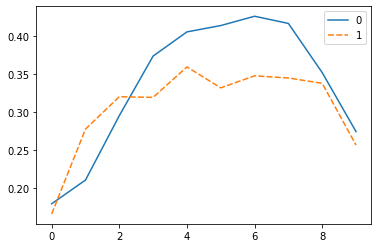

In [0]:
sns.lineplot(data=[Y_pred[0], Y_new[0].reshape(-1)]);

### Sequence-to-Sequence RNN

In [0]:
Y = np.empty((10000, n_steps, 10)) # each target is a sequence of 10D vectors
for step_ahead in range(1, 10 + 1):
    Y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [0]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.LayerNormalization(),
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [0]:
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])

In [0]:
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

In [0]:
model.evaluate(X_test, Y_test)

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.018535913690924645, 0.0064029535]

#### Layer Normalization

In [0]:
class LNSimpleRNNCell(keras.layers.Layer):
    def __init__(self, units, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = keras.layers.SimpleRNNCell(units,
                                                          activation=None)
        self.layer_norm = keras.layers.LayerNormalization()
        self.activation = keras.activations.get(activation)
        
    def call(self, inputs, states):
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs]

In [0]:
model = keras.models.Sequential([
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True,
                     input_shape=[None, 1]),
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])


### LSTM and GRU

In [0]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding="valid",
                        input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))])

In [0]:
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train[:, 3::2], epochs=20,
                    validation_data=(X_valid, Y_valid[:, 3::2]))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.0704 - last_time_step_mse: 0.0624 - val_loss: 0.0462 - val_last_time_step_mse: 0.0383
Epoch 2/20
7000/7000 [==============================] - 6s 853us/sample - loss: 0.0410 - last_time_step_mse: 0.0330 - val_loss: 0.0356 - val_last_time_step_mse: 0.0269
Epoch 3/20
7000/7000 [==============================] - 6s 902us/sample - loss: 0.0331 - last_time_step_mse: 0.0243 - val_loss: 0.0305 - val_last_time_step_mse: 0.0219
Epoch 4/20
7000/7000 [==============================] - 6s 863us/sample - loss: 0.0287 - last_time_step_mse: 0.0189 - val_loss: 0.0265 - val_last_time_step_mse: 0.0166
Epoch 5/20
7000/7000 [==============================] - 6s 849us/sample - loss: 0.0256 - last_time_step_mse: 0.0149 - val_loss: 0.0241 - val_last_time_step_mse: 0.0131
Epoch 6/20
7000/7000 [==============================] - 6s 818us/sample - loss: 0.0240 - last_time_step_mse: 0.01